___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot


import warnings                      
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook   bu notebook zorlar ancak interaktif olarak imkan sağlar.

plt.rcParams["figure.figsize"] = (10,6)   # tüm grafikleri bu ölcüye sabitledik.
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")             # çizime özel yapılabilsede gridleri beyaz yaptı.
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # tüm floatları virgülden sonra 3 karakter verir.

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Importing Modules

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
# Halit
dir = '/content/drive/MyDrive/Clarusway - ML2/1- Projects/Capstone Projects/2_C9_DS_Capstone_Projects_(Churn Analysis)/'
path = dir + 'HR_Dataset.csv'

In [23]:
# path = "/content/drive/MyDrive/HR_Dataset.csv"   # Balkan

In [24]:
df = pd.read_csv(path)

In [25]:
#  df = pd.read_csv("HR_Dataset.csv")

In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [28]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.000,0.613,0.249,0.090,0.440,0.640,0.820,1.000
last_evaluation,14999.000,0.716,0.171,0.360,0.560,0.720,0.870,1.000
number_project,14999.000,3.803,1.233,2.000,3.000,4.000,5.000,7.000
average_montly_hours,14999.000,201.050,49.943,96.000,156.000,200.000,245.000,310.000
time_spend_company,14999.000,3.498,1.460,2.000,3.000,3.000,4.000,10.000
Work_accident,14999.000,0.145,0.352,0.000,0.000,0.000,0.000,1.000
left,14999.000,0.238,0.426,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,14999.000,0.021,0.144,0.000,0.000,0.000,0.000,1.000


In [30]:
## memnuniyet ortalaması altında olanlar     (left)
## performans değerlemesine göre bakalım     (left)
## yapmış olduğu proje sayısı (ayrılma için bir gösterge olabilir mi?) 
    # (maaş + çalışma zaman+proje sayısı = groupby)

## Aylık çalışma zamanı aidiyet olgusunun göstergesi o nedenle az olanalar ayrılma potansiyeli yüksek

## şirkette çalışma süresi ayrılmak için bir gösterge mi?
## şirkette meydana gelen kaza ?


In [31]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [32]:
df.duplicated(subset = None, keep = 'first').sum()

3008

In [33]:
from pandas.core.frame import DataFrame
df.drop_duplicates(keep='first', inplace = True)

In [34]:
df.columns = df.columns.str.lower().str.replace(" ", "")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [36]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [45]:
df["salary_cat"] = df.salary.map({"low": 1, "medium" : 2, 'high':3})
df.drop(['salary'], axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary_cat             11991 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.0+ MB


In [39]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat
left,,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019,1.638
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004,1.434


In [40]:
df.groupby("left")[["satisfaction_level", "promotion_last_5years"]].sum()

,satisfaction_level,promotion_last_5years
left,,
0,6673.650,195
1,876.580,8


In [41]:
df.groupby(["salary_cat", "left"])[["satisfaction_level", "promotion_last_5years"]].mean()

satisfaction_level  promotion_last_5years
salary_cat left                                           
1          0                  0.669                  0.007
           1                  0.441                  0.004
2          0                  0.668                  0.026
           1                  0.440                  0.004
3          0                  0.654                  0.047
           1                  0.438                  0.000

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

(-1.25, 1.25, -1.25, 1.25)

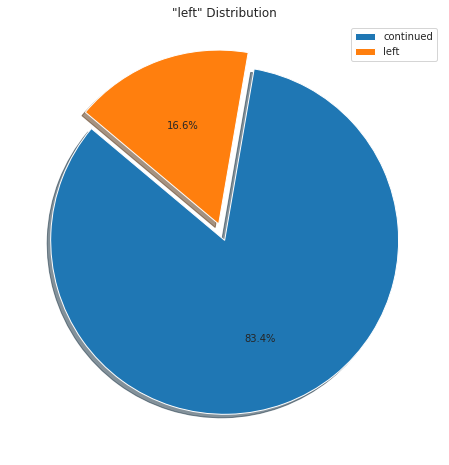

In [ ]:
plt.figure(figsize=(8,8))
explode = [0, 0.1]
plt.pie(df['left'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['continued','left'])
plt.title('"left" Distribution')
plt.axis('off')

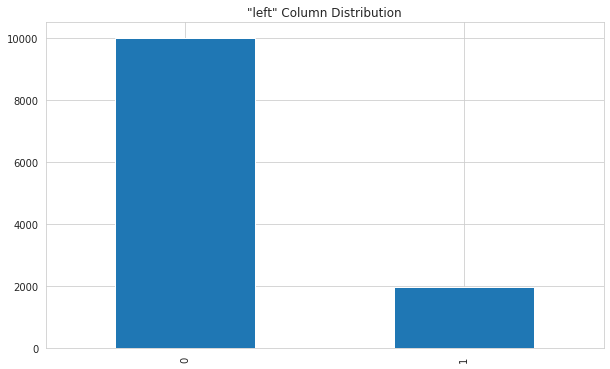

In [ ]:
plt.figure(figsize=(10,6))
df['left'].value_counts().plot(kind="bar", title = '"left" Column Distribution')

In [ ]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

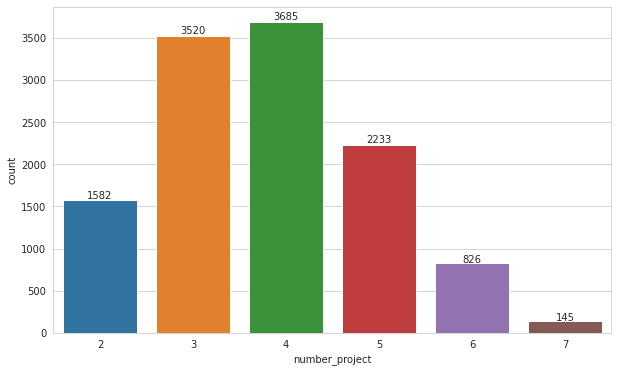

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = "number_project", data = df)
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center") 

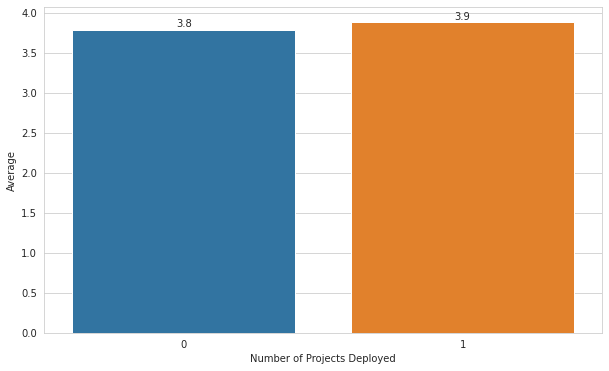

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='left', y='number_project', data=df, ci=None)
# plt.title('Project Numbers Distribution')
plt.xlabel('Number of Projects Deployed')
plt.ylabel('Average')
#show values on barplot
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.1f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center") 

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


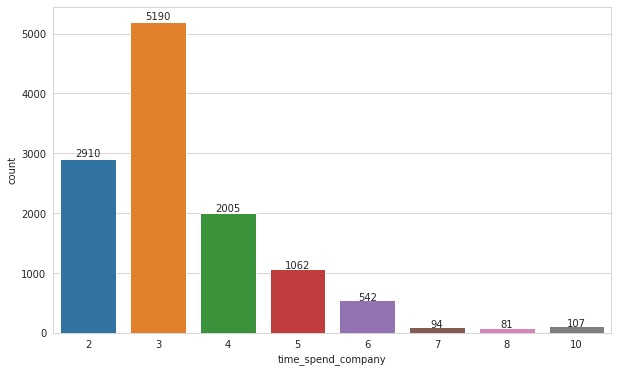

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = "time_spend_company", data = df)
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center") 

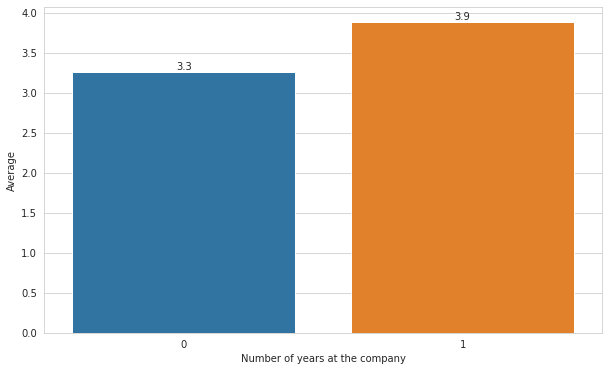

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='left', y='time_spend_company', data=df, ci=None)
# plt.title('Project Numbers Distribution')
plt.xlabel('Number of years at the company')
plt.ylabel('Average')
#show values on barplot
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.1f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center") 

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary,salary_cat
0,0.380,0.530,2,157,3,0,1,0,sales,low,1
1,0.800,0.860,5,262,6,0,1,0,sales,medium,2
2,0.110,0.880,7,272,4,0,1,0,sales,medium,2
3,0.720,0.870,5,223,5,0,1,0,sales,low,1
4,0.370,0.520,2,159,3,0,1,0,sales,low,1


### Subplots of Features

You can use the methods of the matplotlib.

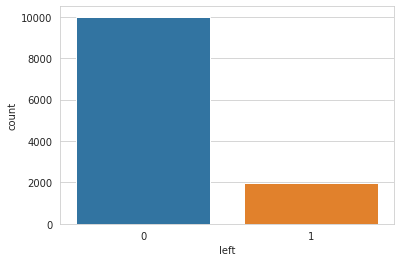

In [ ]:
ax = sns.countplot(data=df[['left', 'promotion_last_5years']], x='left')

In [ ]:
a = df.left.value_counts().index
b = df.left.value_counts()

<Figure size 720x432 with 0 Axes>

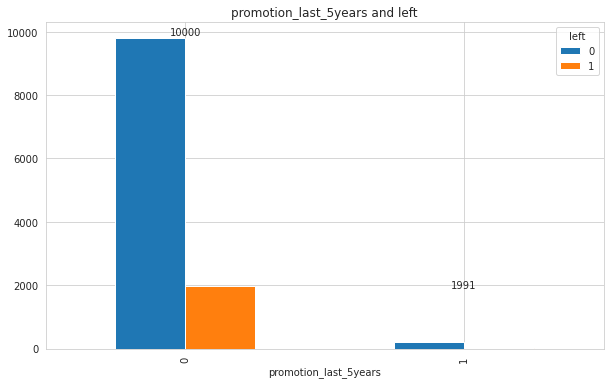

In [ ]:
plt.figure(figsize=(10,6))
pd.crosstab(df['promotion_last_5years'], df['left']).plot.bar(title = 'promotion_last_5years and left', figsize=(10,6))
for i in range(len(a)):
    plt.text(a[i], b[i], str(b[i]), ha="center",va="center")

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [ ]:
df_kmeans= df[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "work_accident", "promotion_last_5years","salary_cat"]]
df_kmeans.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat
0,0.380,0.530,2,157,3,0,0,1
1,0.800,0.860,5,262,6,0,0,2
2,0.110,0.880,7,272,4,0,0,2
3,0.720,0.870,5,223,5,0,0,1
4,0.370,0.520,2,159,3,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df_kmeans)

StandardScaler()

In [ ]:
df_kmeans_scaled= scaler.transform(df_kmeans)

In [ ]:
X = df_kmeans_scaled

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [ ]:
K_means_model.fit_predict(X)

array([4, 2, 2, ..., 3, 3, 1], dtype=int32)

In [ ]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=100)

In [ ]:
K_means_model.labels_

array([4, 2, 2, ..., 3, 3, 1], dtype=int32)

## Hopkins Test

In [ ]:
!pip install pyclustertend

In [ ]:
from pyclustertend import hopkins

In [ ]:
X.shape

(11991, 8)

In [ ]:
hopkins(X, X.shape[0])

0.11626503308212345

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [ ]:
ssd = []

K = range(2,10)                                         

for k in K:
    model = KMeans(init='k-means++',n_clusters =k, random_state=42)
    model.fit(X)                                        
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

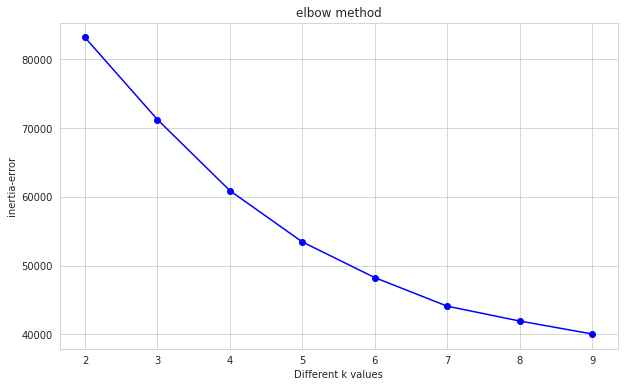

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,11926.383
3,10340.904
4,7457.043
5,5185.586
6,4152.887
7,2156.489
8,1882.346


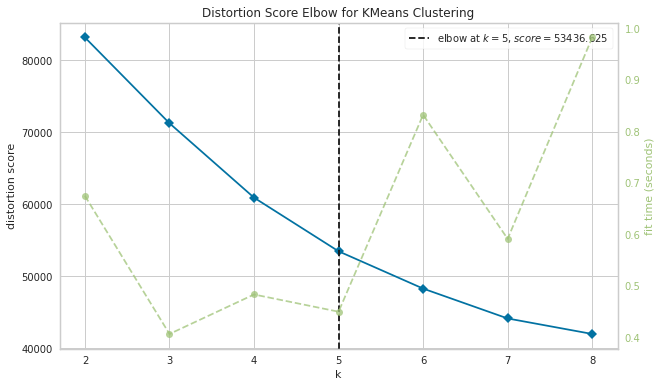

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, K_means_model.fit_predict(X))

0.19576719806987394

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(init='k-means++',n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.18766498596073858
For n_clusters=3, the silhouette score is 0.19479389526403726
For n_clusters=4, the silhouette score is 0.22982232646106265
For n_clusters=5, the silhouette score is 0.19576719806987394
For n_clusters=6, the silhouette score is 0.20062145461360179
For n_clusters=7, the silhouette score is 0.2135313437839854
For n_clusters=8, the silhouette score is 0.20438250484962361


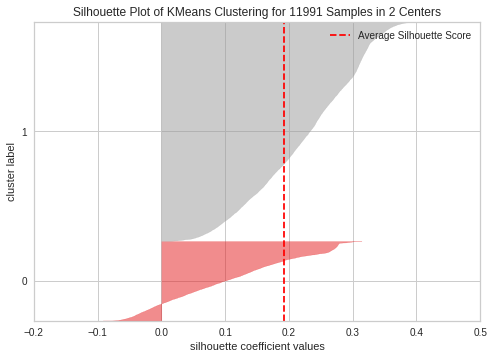

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [ ]:
model = KMeans(n_clusters =2, random_state=42)
model.fit_predict(X)

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
clusters = model.labels_
clusters

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
df_kmeans["predicted_clusters"] = clusters
df_kmeans.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat,predicted_clusters
0,0.380,0.530,2,157,3,0,0,1,1
1,0.800,0.860,5,262,6,0,0,2,0
2,0.110,0.880,7,272,4,0,0,2,0
3,0.720,0.870,5,223,5,0,0,1,0
4,0.370,0.520,2,159,3,0,0,1,1


In [ ]:
df_kmeans = pd.concat([df_kmeans, df.left], axis=1)

In [ ]:
df_kmeans.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat,predicted_clusters,left
0,0.380,0.530,2,157,3,0,0,1,1,1
1,0.800,0.860,5,262,6,0,0,2,0,1
2,0.110,0.880,7,272,4,0,0,2,0,1
3,0.720,0.870,5,223,5,0,0,1,0,1
4,0.370,0.520,2,159,3,0,0,1,1,1


In [ ]:
pd.crosstab(df_kmeans.predicted_clusters, df_kmeans.left)

left,0,1
predicted_clusters,,
0,2272,1076
1,7728,915


## 5. Model Building

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary,salary_cat
0,0.380,0.530,2,157,3,0,1,0,sales,low,1
1,0.800,0.860,5,262,6,0,1,0,sales,medium,2
2,0.110,0.880,7,272,4,0,1,0,sales,medium,2
3,0.720,0.870,5,223,5,0,1,0,sales,low,1
4,0.370,0.520,2,159,3,0,1,0,sales,low,1


## Gradient Boosting Classifier

In [ ]:
df_gb = df.drop("salary_cat", axis=1)

In [ ]:
df_gb = pd.get_dummies(df_gb, columns = ['departments','salary'], drop_first = True)

In [ ]:
df_gb.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_low,salary_medium
0,0.380,0.530,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.800,0.860,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.110,0.880,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.720,0.870,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.370,0.520,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
X = df_gb.drop('left', axis = 1)
y = df_gb['left']

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

In [62]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")
    plot_confusion_matrix(model, X_train, y_train, cmap="plasma")

### #Gradient Boosting Classifier

#### Model Building

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [147]:
grad_model = GradientBoostingClassifier(random_state=42)

In [148]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [149]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[2970   25]
 [  48  555]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.96      0.92      0.94       603

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6962   43]
 [  98 1290]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7005
           1       0.97      0.93      0.95      1388

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



In [150]:
grad_model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(grad_model, X_train, y_train.values, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.982
test_precision   0.961
test_recall      0.927
test_f1          0.944
test_roc_auc     0.985
dtype: float64

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [ ]:
!pip install yellowbrick

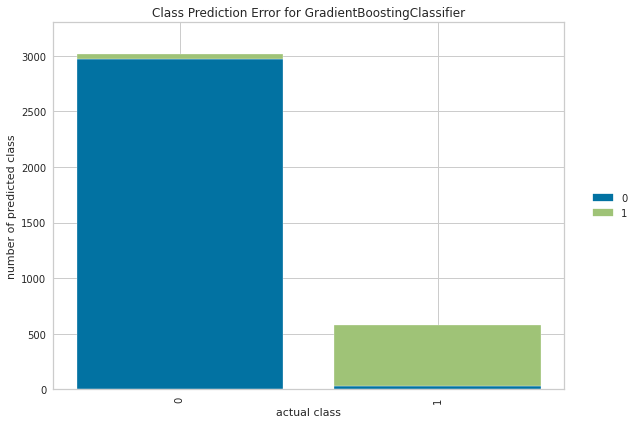

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(grad_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

In [151]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [152]:
grad_model = GradientBoostingClassifier(random_state=42)

In [153]:
grid = GridSearchCV(grad_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [154]:
grid.best_params_

{'max_features': 3, 'n_estimators': 300, 'subsample': 0.5}

In [155]:
eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[2973   22]
 [  46  557]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.96      0.92      0.94       603

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6981   24]
 [  86 1302]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7005
           1       0.98      0.94      0.96      1388

    accuracy                           0.99      8393
   macro avg       0.98      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



In [156]:
y_pred = grid.predict(X_test)

grad_f1 = f1_score(y_test, y_pred)
grad_recall = recall_score(y_test, y_pred)
grad_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[2973   22]
 [  46  557]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.96      0.92      0.94       603

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6981   24]
 [  86 1302]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7005
           1       0.98      0.94      0.96      1388

    accuracy                           0.99      8393
   macro avg       0.98      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



In [157]:
grid.best_params_

{'max_features': 3, 'n_estimators': 300, 'subsample': 0.5}

In [158]:
grad_model = GradientBoostingClassifier(max_features= 3, n_estimators = 300, subsample = 0.5, random_state=42)
grad_model.fit(X_train, y_train)

grad_model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=grad_model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance", ascending=False)
grad_imp_feats

,grad_importance
satisfaction_level,0.409
number_project,0.187
time_spend_company,0.178
average_montly_hours,0.125
last_evaluation,0.096
salary_cat,0.004
work_accident,0.002
promotion_last_5years,0.000


Text(0.5, 1.0, 'Importance Features')

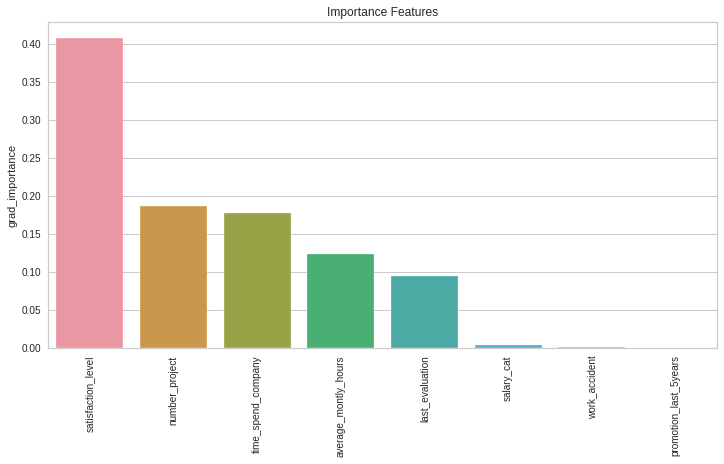

In [159]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);
plt.title('Importance Features')
# ax.bar_label(ax.containers[0],fmt='%.2f');

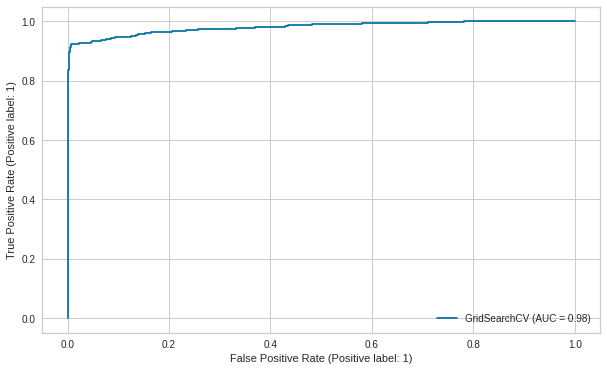

In [160]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
plot_roc_curve(grid, X_test, y_test);

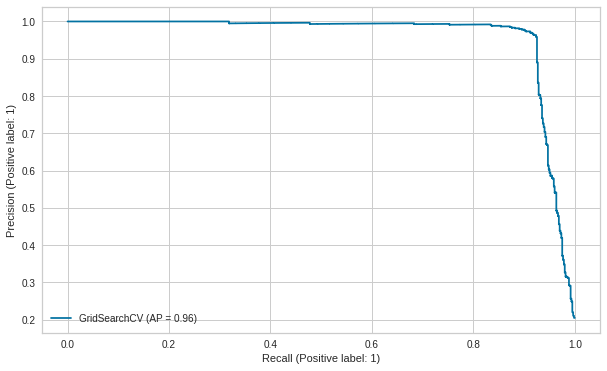

In [161]:
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
plot_precision_recall_curve(grid, X_test, y_test);

#### Prediction

In [162]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat
0,0.380,0.530,2,157,3,0,0,1
1,0.800,0.860,5,262,6,0,0,2
2,0.110,0.880,7,272,4,0,0,2
3,0.720,0.870,5,223,5,0,0,1
4,0.370,0.520,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,1,3
11996,0.740,0.950,5,266,10,0,1,3
11997,0.850,0.540,3,185,10,0,1,3
11998,0.330,0.650,3,172,10,0,1,3


In [165]:
X = X.iloc[:,[0,1,2,3,4]]    # selected features
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')

In [168]:
scaler = MinMaxScaler()

In [169]:
X_scaled = scaler.fit_transform(X)

In [170]:
import pickle
pickle.dump(scaler, open(dir+"scaler_minmax.pkl", 'wb'))

In [171]:
grid.best_params_

{'max_features': 3, 'n_estimators': 300, 'subsample': 0.5}

In [172]:
final_model = GradientBoostingClassifier(max_features= 3, n_estimators = 300, subsample = 0.5, random_state=42).fit(X_scaled, y)

In [173]:
pickle.dump(final_model, open(dir+"final_model", 'wb'))

### Predict new data

In [ ]:
my_dict = {"satisfaction_level": [0.10, 0.40, 0.50],
           "time_spend_company": [2.00, 5.00, 9.00],
           "number_project": [3.00, 5.00, 6.00],
           "last_evaluation": [0.40, 0.70, 0.90],
           "average_montly_hours": [100.00, 150.00, 280.00]
          }

In [ ]:
sample = pd.DataFrame(my_dict)
sample

,satisfaction_level,time_spend_company,number_project,last_evaluation,average_montly_hours
0,0.100,2.000,3.000,0.400,100.000
1,0.400,5.000,5.000,0.700,150.000
2,0.500,9.000,6.000,0.900,280.000


In [ ]:
scaler_stan = pickle.load(open("scaler_stan", "rb"))

In [ ]:
sample_scaled = scaler_stan.transform(sample)
sample_scaled

array([[0.01098901, 0.        , 0.2       , 0.0625    , 0.01869159],
       [0.34065934, 0.375     , 0.6       , 0.53125   , 0.25233645],
       [0.45054945, 0.875     , 0.8       , 0.84375   , 0.85981308]])

In [ ]:
final_model = pickle.load(open("final_model_grad", "rb"))

In [ ]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [ ]:
sample["pred"] = predictions
sample["pred_proba_0"] = predictions_proba[:,0]
sample["pred_proba_1"] = predictions_proba[:,1]
sample

,satisfaction_level,time_spend_company,number_project,last_evaluation,average_montly_hours,pred,pred_proba_0,pred_proba_1
0,0.100,2.000,3.000,0.400,100.000,0,0.627,0.373
1,0.400,5.000,5.000,0.700,150.000,0,0.935,0.065
2,0.500,9.000,6.000,0.900,280.000,0,0.997,0.003


### KNeighbors Classifier

#### Model Building

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [48]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary_cat
0,0.380,0.530,2,157,3,0,1,0,sales,1
1,0.800,0.860,5,262,6,0,1,0,sales,2
2,0.110,0.880,7,272,4,0,1,0,sales,2
3,0.720,0.870,5,223,5,0,1,0,sales,1
4,0.370,0.520,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,0,1,management,3
11996,0.740,0.950,5,266,10,0,0,1,management,3
11997,0.850,0.540,3,185,10,0,0,1,management,3
11998,0.330,0.650,3,172,10,0,0,1,marketing,3


In [117]:
dfknn = df.copy()
dfknn = pd.get_dummies(dfknn, columns = ['departments'], drop_first=True)  # ? salary
dfknn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_cat,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical
0,0.380,0.530,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.800,0.860,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.110,0.880,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.720,0.870,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.370,0.520,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [118]:
X = dfknn.drop('left', axis = 1)
y = dfknn['left']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [120]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

#### Evaluating Model Performance

In [67]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix,classification_report,plot_confusion_matrix

In [68]:
y_pred = knn_model.predict(X_test)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2890  111]
 [  70  527]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3001
           1       0.83      0.88      0.85       597

    accuracy                           0.95      3598
   macro avg       0.90      0.92      0.91      3598
weighted avg       0.95      0.95      0.95      3598


Train_Set
[[6824  175]
 [ 167 1227]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6999
           1       0.88      0.88      0.88      1394

    accuracy                           0.96      8393
   macro avg       0.93      0.93      0.93      8393
weighted avg       0.96      0.96      0.96      8393



In [72]:
# def func    balanced=True  -> accuracy, 
test_error_rates = []
train_error_rates = []


for k in range(1,30):  # modele 1-30 arasında k değeri veriyorum. ve herbir k değeri için bir predict alacak ve bunlar için bir error hesaplayacağız.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train) 
   
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    test_error = 1 - f1_score(y_test,y_pred_test) # data dengeli olmadiğindan dolayı f1 score baktık.
    # dengeli olmadigi zaman f1, recall veya precission bakarım.
    train_error = 1 - f1_score(y_train,y_pred_train)
    
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

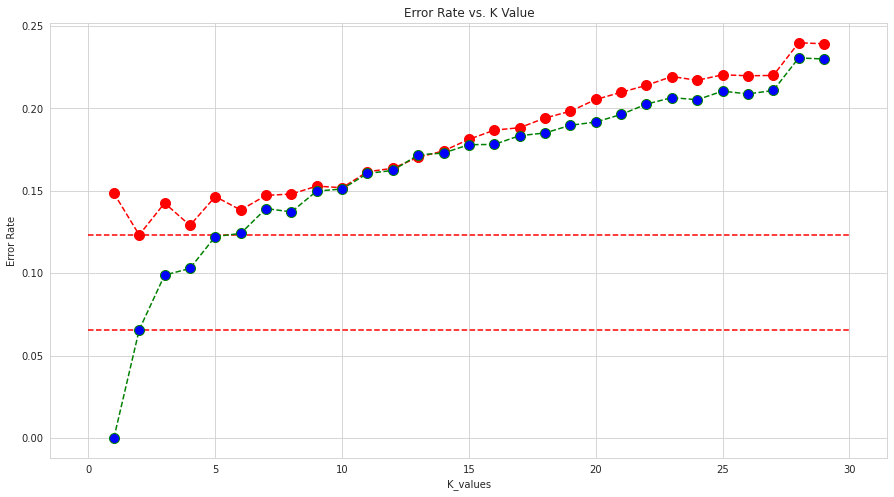

In [80]:
plt.figure(figsize=(15,8))

plt.plot(range(1,30), test_error_rates, color='red', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0653, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.123, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [87]:
K = 4

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=K)

knn_model.fit(X_train,y_train)
print('WITH K=', K, '\n')

y_pred = knn_model.predict(X_test)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

eval_metric(knn_model, X_train, y_train, X_test, y_test)

WITH K= 4 

Test_Set
[[2920   81]
 [  74  523]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3001
           1       0.87      0.88      0.87       597

    accuracy                           0.96      3598
   macro avg       0.92      0.92      0.92      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6904   95]
 [ 183 1211]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6999
           1       0.93      0.87      0.90      1394

    accuracy                           0.97      8393
   macro avg       0.95      0.93      0.94      8393
weighted avg       0.97      0.97      0.97      8393



In [89]:
from sklearn.model_selection import cross_val_score, cross_validate

In [90]:
model = KNeighborsClassifier(n_neighbors=K)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.952
test_precision   0.861
test_recall      0.846
test_f1          0.853
dtype: float64

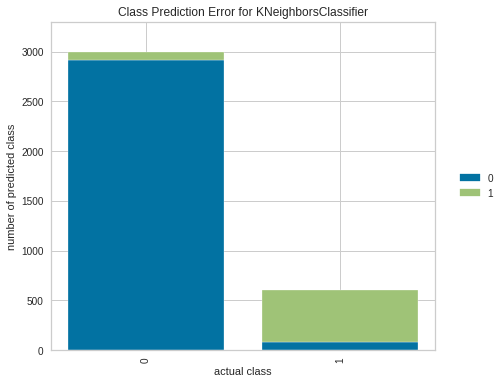

In [91]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(knn_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
knn_grid = KNeighborsClassifier() 

In [94]:
k_values= range(1,30)

In [95]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [96]:
grid_knn = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'f1')
# model dengede olmadiğindan f1 aldık. 

In [97]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [98]:
grid_knn.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

In [ ]:
K = 4
P = 1
WEIGHTS = 'uniform'

In [99]:
print('WITH ', grid_knn.best_params_ , '\n')

y_pred = grid_knn.predict(X_test)
knn_grid_f1 = f1_score(y_test, y_pred)
knn_grid_recall = recall_score(y_test, y_pred)
knn_grid_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid_knn, X_train, y_train, X_test, y_test)

WITH  {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'} 

Test_Set
[[2922   79]
 [  73  524]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3001
           1       0.87      0.88      0.87       597

    accuracy                           0.96      3598
   macro avg       0.92      0.93      0.92      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6902   97]
 [ 171 1223]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6999
           1       0.93      0.88      0.90      1394

    accuracy                           0.97      8393
   macro avg       0.95      0.93      0.94      8393
weighted avg       0.97      0.97      0.97      8393



In [100]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

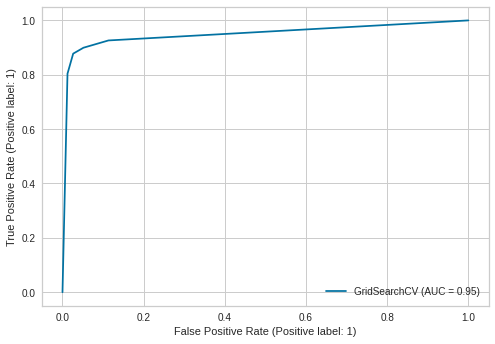

In [101]:
plot_roc_curve(grid_knn, X_test, y_test)

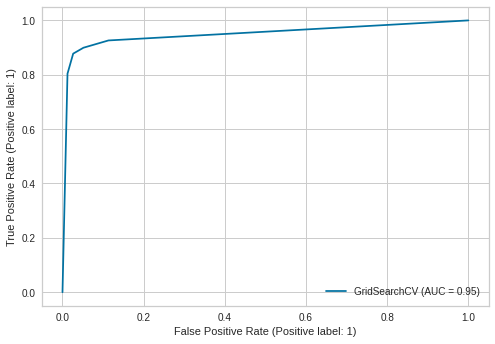

In [102]:
plot_roc_curve(grid_knn, X_test, y_test)

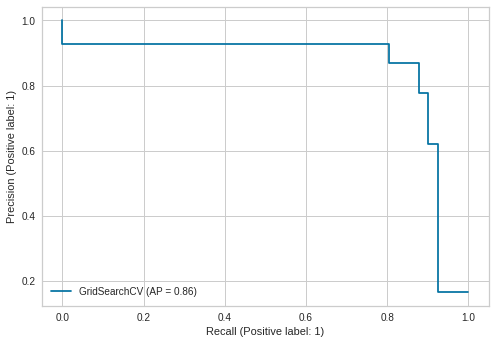

In [103]:
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
plot_precision_recall_curve(grid_knn, X_test, y_test);

#### Deploy Model

In [122]:
X = scaler.fit_transform(X)

In [124]:
import pickle
pickle.dump(scaler, open(dir + "scaler_minmax.pkl", 'wb'))

In [125]:
final_model_knn = grid_knn

In [126]:
pickle.dump(final_model_knn, open(dir + "final_model_knn.pkl", 'wb'))

In [110]:
my_dict = {"satisfaction_level": [0.10, 0.40, 0.50],
           "time_spend_company": [2.00, 5.00, 9.00],
           "number_project": [3.00, 5.00, 6.00],
           "last_evaluation": [0.40, 0.70, 0.90],
           "average_montly_hours": [100.00, 150.00, 280.00]
          }

In [111]:
sample = pd.DataFrame(my_dict)
sample

,satisfaction_level,time_spend_company,number_project,last_evaluation,average_montly_hours
0,0.100,2.000,3.000,0.400,100.000
1,0.400,5.000,5.000,0.700,150.000
2,0.500,9.000,6.000,0.900,280.000


In [112]:
scaler_min = pickle.load(open(dir + "scaler_min", "rb"))

In [113]:
sample_scaled = scaler_min.transform(sample)
sample_scaled

array([[0.01098901, 0.        , 0.2       , 0.0625    , 0.01869159],
       [0.34065934, 0.375     , 0.6       , 0.53125   , 0.25233645],
       [0.45054945, 0.875     , 0.8       , 0.84375   , 0.85981308]])

In [ ]:
final_model_knn = pickle.load(open(dir + "final_model_knn", "rb"))

In [ ]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [ ]:
sample["pred"] = predictions
sample["pred_proba_0"] = predictions_proba[:,0]
sample["pred_proba_1"] = predictions_proba[:,1]
sample

### #Random Forest Classifier

#### Model Building

In [127]:
df_rf= df[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "work_accident", "promotion_last_5years","salary_cat", "left"]]
df_rf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat,left
0,0.380,0.530,2,157,3,0,0,1,1
1,0.800,0.860,5,262,6,0,0,2,1
2,0.110,0.880,7,272,4,0,0,2,1
3,0.720,0.870,5,223,5,0,0,1,1
4,0.370,0.520,2,159,3,0,0,1,1


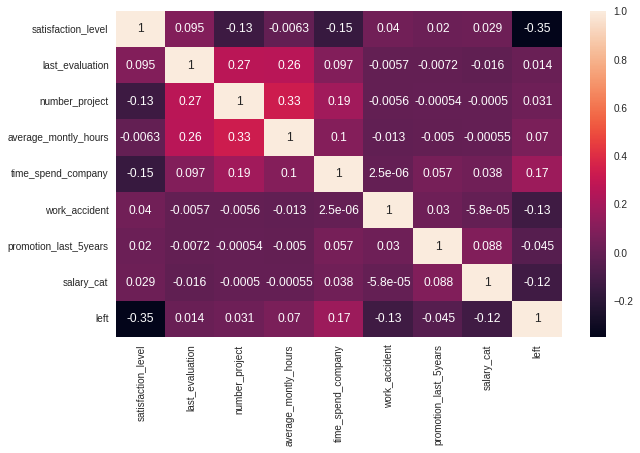

In [128]:
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df_rf.corr(), annot=True);

In [129]:
X = df_rf.drop('left',axis=1)
y = df_rf['left']

In [ ]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Evaluating Model Performance

In [134]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2984   11]
 [  55  548]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       0.98      0.91      0.94       603

    accuracy                           0.98      3598
   macro avg       0.98      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[7005    0]
 [   0 1388]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7005
           1       1.00      1.00      1.00      1388

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [137]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.985
test_precision_micro   0.985
test_recall_micro      0.985
test_f1_micro          0.985
dtype: float64

In [138]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
satisfaction_level,0.331
number_project,0.180
time_spend_company,0.171
average_montly_hours,0.169
last_evaluation,0.130
salary_cat,0.011
work_accident,0.006
promotion_last_5years,0.001


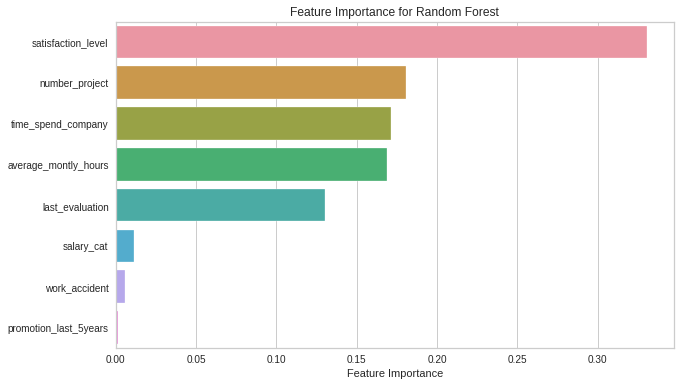

In [139]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

#### Prediction

In [140]:
df_rf.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.000,0.630,0.241,0.090,0.480,0.660,0.820,1.000
last_evaluation,11991.000,0.717,0.168,0.360,0.570,0.720,0.860,1.000
number_project,11991.000,3.803,1.163,2.000,3.000,4.000,5.000,7.000
average_montly_hours,11991.000,200.474,48.728,96.000,157.000,200.000,243.000,310.000
time_spend_company,11991.000,3.365,1.330,2.000,3.000,3.000,4.000,10.000
work_accident,11991.000,0.154,0.361,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,11991.000,0.017,0.129,0.000,0.000,0.000,0.000,1.000
salary_cat,11991.000,1.604,0.636,1.000,1.000,2.000,2.000,3.000
left,11991.000,0.166,0.372,0.000,0.000,0.000,0.000,1.000


In [141]:
observations = df_rf.iloc[1985:1995]

In [142]:
obs = pd.DataFrame(observations.reset_index())
obs.drop(columns= ["index", "left"], inplace=True)
obs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat
0,0.430,0.540,2,156,3,0,0,1
1,0.370,0.570,2,147,3,0,0,1
2,0.110,0.920,7,293,4,0,0,1
3,0.410,0.530,2,157,3,0,0,1
4,0.840,0.960,4,247,5,0,0,1
5,0.400,0.510,2,148,3,0,0,1
6,0.580,0.740,4,215,3,0,0,1
7,0.820,0.670,2,202,3,0,0,1
8,0.450,0.690,5,193,3,0,0,1
9,0.780,0.820,5,247,3,0,0,1


In [143]:
pred = rf_model.predict(obs)
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [144]:
pred = pd.Series(pred).rename("prediction")
pred

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    0
9    0
Name: prediction, dtype: int64

In [145]:
pd.concat([observations.reset_index(), pred], axis = 1)

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_cat,left,prediction
0,1994,0.430,0.540,2,156,3,0,0,1,1,1
1,1995,0.370,0.570,2,147,3,0,0,1,1,1
2,1996,0.110,0.920,7,293,4,0,0,1,1,1
3,1997,0.410,0.530,2,157,3,0,0,1,1,1
4,1998,0.840,0.960,4,247,5,0,0,1,1,1
5,1999,0.400,0.510,2,148,3,0,0,1,1,1
6,2000,0.580,0.740,4,215,3,0,0,1,0,0
7,2001,0.820,0.670,2,202,3,0,0,1,0,0
8,2002,0.450,0.690,5,193,3,0,0,1,0,0
9,2003,0.780,0.820,5,247,3,0,0,1,0,0


## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [ ]:
import pickle
pickle.dump(scaler, open(dir + "scaler_minmax.pkl", 'wb'))

In [ ]:
pickle.dump(final_model, open(dir + "final_model.pkl", 'wb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___